# Rule: **base_network**

**Outputs**

- resources/networks/`base.nc`
- resources/`regions_onshore.geojson`
- resources/`regions_offshore.geojson`


In [1]:
######################################## Parameters

### Run
name = ''
prefix = ''

In [2]:
##### Import packages
import pypsa
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import yaml
import os 
import sys


##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


##### Region files
file_regions_onshore = f'regions_onshore.geojson'
file_regions_offshore = f'regions_offshore.geojson'
path_regions = f'{params['rootpath']}/resources/{prefix}/{name}/'
gdf_regions_onshore = gpd.read_file(path_regions+file_regions_onshore)
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)

## `base.nc`

Load the network and show its components.

In [3]:
file = f'base.nc'
path = f'{params['rootpath']}/resources/{prefix}/{name}/networks/'

n = pypsa.Network(path+file)

n

INFO:pypsa.io:Imported network base.nc has buses, carriers, lines, links, shapes, transformers


PyPSA Network 'PyPSA-Eur (osm-prebuilt v0.6)'
---------------------------------------------
Components:
 - Bus: 1041
 - Carrier: 2
 - Line: 1230
 - Link: 4
 - Shape: 2
 - Transformer: 99
Snapshots: 8760

Plot the network.

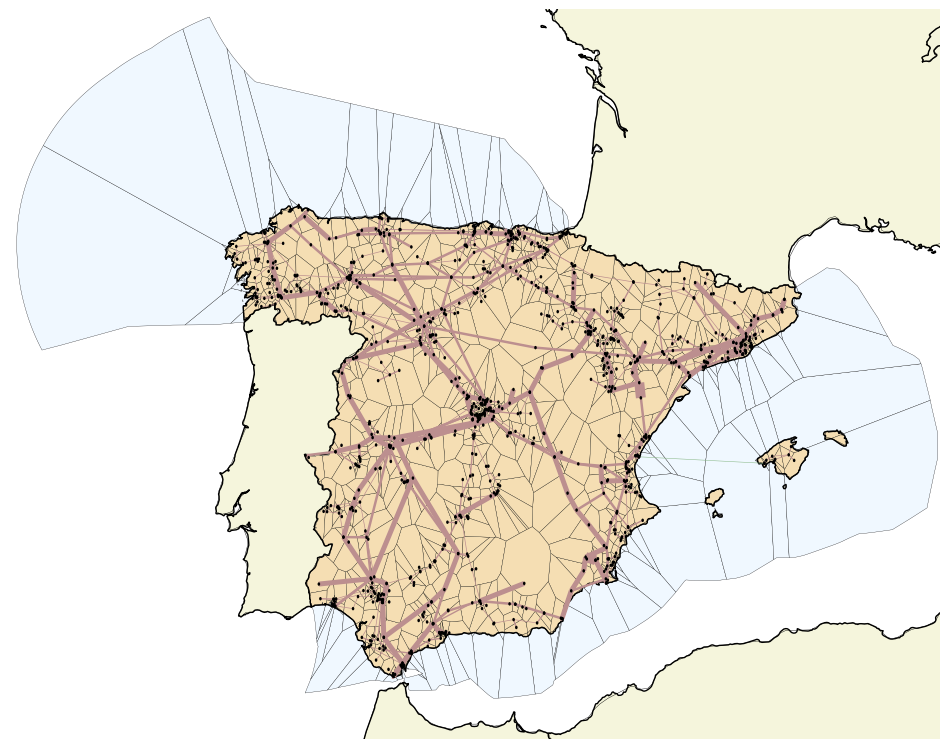

In [4]:
#################### Parameters
line_widths = 1*n.lines.s_nom / 1e3
link_widths = 1*n.links.p_nom / 1e3



#################### Figure
fig_size = [12,12]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add network
n.plot(ax=ax, 
       line_widths=line_widths, 
       link_widths=link_widths, 
       bus_sizes=params['bus_sizes'], 
       bus_colors=params['bus_colors'], 
       boundaries=params['boundaries_offshore'])

### Add regions_onshore
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add regions_offshore
xp.map_add_region(ax, gdf_regions_offshore, params['map_add_region'], is_offshore=True)

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Variable: `n.buses`

Place `n.buses` in a dataFrame and show its content.

In [5]:
bb = n.buses

bb.head()

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country,substation_off,symbol,tags,substation_lv,under_construction,geometry,onshore_bus
Bus,,,,,,,,,,,,,,,,,,,,
ES1-400,400.0,,-7.478964,43.702028,AC,,1.0,0.0,inf,PQ,,,ES,True,Substation,ES1,True,False,POINT (-7.478963550093904 43.7020276396567),True
ES10-220,220.0,,-3.849633,43.344541,AC,,1.0,0.0,inf,PQ,,,ES,True,Substation,ES10,True,False,POINT (-3.849633099999998 43.3445405893267),True
ES100-220,220.0,,1.344685,42.318896,AC,,1.0,0.0,inf,PQ,,,ES,True,Substation,ES100,True,False,POINT (1.3446848999999976 42.31889588845269),True
ES101-220,220.0,,-8.138020,42.300963,AC,,1.0,0.0,inf,PQ,,,ES,True,Substation,ES101,True,False,POINT (-8.138019599999994 42.30096278843702),True
ES102-220,220.0,,-8.080452,42.288093,AC,,1.0,0.0,inf,PQ,,,ES,True,Substation,ES102,True,False,POINT (-8.080452199999987 42.28809258842574),True


### Variable: `n.carriers`

Place `n.carriers` in a dataFrame and show its content.

In [6]:
cc = n.carriers

cc.head()

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.0,,,inf,0.0
DC,0.0,,,inf,0.0


### Variable: `n.lines`

Place `n.lines` in a dataFrame and show its content.

In [7]:
ln = n.lines

ln.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,x_pu_eff,r_pu_eff,s_nom_opt,under_construction,v_nom,tags,underground,geometry,i_nom,dc
Line,,,,,,,,,,,,,,,,,,,,,
merged_way/1003637832-220+1,way/965347086-220,ES198-220,Al/St 240/40 2-bundle 220.0,3.084458,0.614842,0.0,0.000040,491.556019,0.0,False,...,0.0,0.0,0.0,False,220,way/1263295231-220;way/1003637832-220,False,LINESTRING (-1.011827900564515 41.083151709139...,1.29,False
merged_way/1028922335-220+1,ES195-220,way/1027086227-220,Al/St 240/40 2-bundle 220.0,2.164551,0.431472,0.0,0.000028,491.556019,0.0,False,...,0.0,0.0,0.0,False,220,way/1028922335-220;way/1028922334-220,False,LINESTRING (-0.9957507000000007 41.14652898740...,1.29,False
merged_way/1038373181-220+1,way/1038373182-220,way/43797051-220,Al/St 240/40 2-bundle 220.0,1.235193,0.246218,0.0,0.000064,983.112038,0.0,False,...,0.0,0.0,0.0,False,220,way/1038373180-220;way/1038373181-220,True,LINESTRING (-5.9311712933154 37.39026330625038...,1.29,False
merged_way/103881921-220+1,way/140781473-220,way/103511952-220,Al/St 240/40 2-bundle 220.0,29.176108,5.815835,0.0,0.000381,491.556019,0.0,False,...,0.0,0.0,0.0,False,220,way/103881921-220;way/192338243-220,False,LINESTRING (-7.713507966758893 42.626377615178...,1.29,False
merged_way/105272178-220+2,way/75606778-220,ES163-220,Al/St 240/40 2-bundle 220.0,4.395401,0.876160,0.0,0.000057,491.556019,0.0,False,...,0.0,0.0,0.0,False,220,way/105272178-220;way/798824539-220;way/125172...,False,LINESTRING (1.8295132365372069 41.523390180272...,1.29,False


How is the distribution of line lengths?

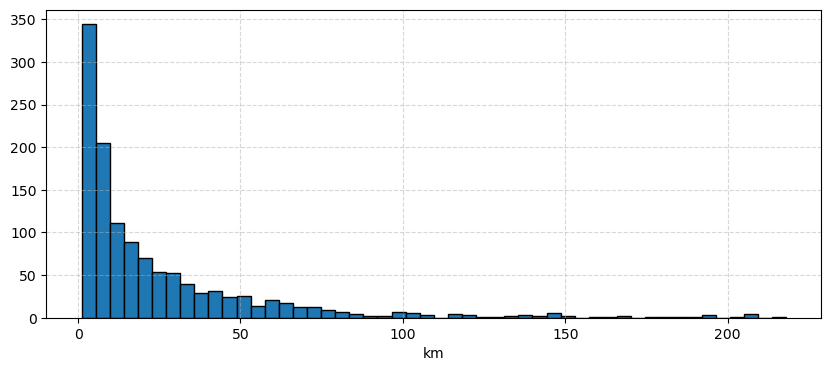

In [8]:
#################### Parameters
bins = 50



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ax.hist(ln['length'], bins=bins, edgecolor='black')

ax.set_xlabel('km')
ax.grid(True, linestyle='--', alpha=0.5)

### Variable: `n.links`

Place `n.links` in a dataFrame and show its content.

In [9]:
lk = n.links

lk.head()

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,under_construction,tags,underground,underwater_fraction,geometry,voltage,dc
Link,,,,,,,,,,,,,,,,,,,,,
relation/17631956-250-DC,way/156435509,way/131323212,,DC,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,False,relation/17631956,True,0.98193,LINESTRING (-0.2354476169104305 39.64108480222...,250,1.0
conv-way/131323212,way/131323212,way/347643820-220,,,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,False,,False,0.00000,LINESTRING (2.5063699330963236 39.533900991353...,250,NaN
conv-way/156435509,way/156435509,way/77654729-400,,,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,False,,False,0.00000,LINESTRING (-0.2354476169104305 39.64108480222...,250,NaN
conv-way/256334221,way/256334221,way/340399370-400,,,1.0,True,0,inf,2000.0,0.0,...,1.0,1.0,0.0,False,,False,0.00000,LINESTRING (2.9442519990141243 42.230385376033...,320,NaN


### Variable: `n.shapes`

Place `n.shapes` in a geodataFrame and show its content.

In [10]:
sh = n.shapes

sh.head()

,geometry,component,idx,type
Shape,,,,
0,"MULTIPOLYGON (((-5.2586 36.31067, -5.26214 36....",,ES,country
1,"MULTIPOLYGON (((-1.925 43.72917, -1.85833 43.6...",,ES,offshore


Represent the shapes.

<Axes: >

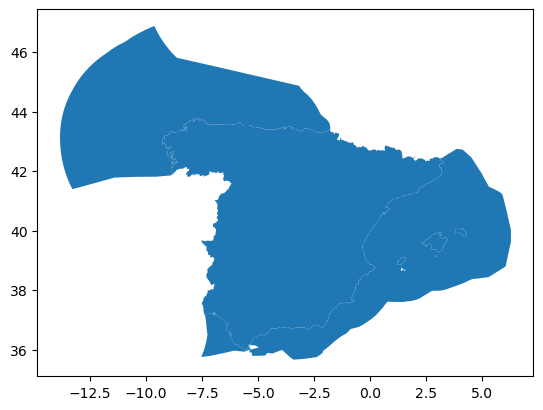

In [11]:
sh.plot()

### Variable: `n.transformers`

Place `n.transformers` in a dataFrame and show its content.

In [12]:
tt= n.transformers

tt.head()

,bus0,bus1,type,model,x,r,g,b,s_nom,s_nom_mod,...,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,voltage_bus1,voltage_bus0,geometry
Transformer,,,,,,,,,,,,,,,,,,,,,
ES103-220-400,ES103-220,ES103-400,,t,0.1,0.0,0.0,0.0,3575.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,220,LINESTRING (-7.227225091778386 42.283844542595...
ES12-220-400,ES12-220,ES12-400,,t,0.1,0.0,0.0,0.0,3575.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,220,LINESTRING (-3.0538614802526163 43.33785193976...
ES18-220-400,ES18-220,ES18-400,,t,0.1,0.0,0.0,0.0,3575.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,220,LINESTRING (-5.9017026093077884 43.32204967116...
ES199-220-400,ES199-220,ES199-400,,t,0.1,0.0,0.0,0.0,5363.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,220,LINESTRING (0.8651093939366029 40.951153356358...
ES257-220-400,ES257-220,ES257-400,,t,0.1,0.0,0.0,0.0,7150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,220,LINESTRING (-0.002023534382151 39.957937289671...


## `regions_onshore.geojson`

Show its content.

In [13]:
gdf_regions_onshore.head()

,name,x,y,country,geometry
0,ES1-400,-7.478964,43.702028,ES,"MULTIPOLYGON (((-7.58247 43.68914, -7.58114 43..."
1,way/171256169-220,-0.722737,38.718882,ES,"POLYGON ((-0.74302 38.73871, -0.60248 38.60282..."
2,way/171274139-220,-0.620287,38.299302,ES,"POLYGON ((-0.68543 38.34265, -0.56261 38.28939..."
3,way/171277174-220,-0.636163,38.264548,ES,"POLYGON ((-0.79377 38.21282, -0.70065 38.31501..."
4,way/171277691-220,-0.736799,38.056276,ES,"POLYGON ((-0.79351 38.21213, -0.63799 38.13698..."


How many regions are there in the file?

In [14]:
len(gdf_regions_onshore)

1041

Represent the shapes.

<Axes: >

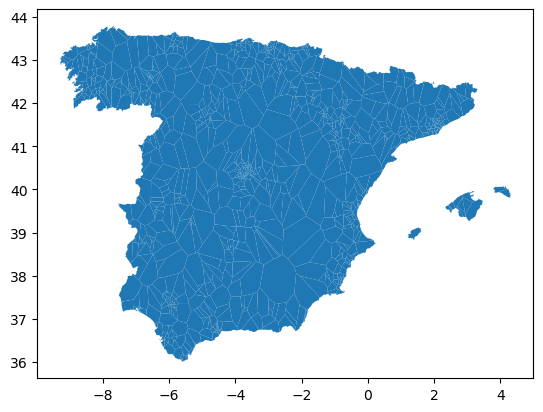

In [15]:
gdf_regions_onshore.plot()

## `regions_offshore.geojson`

Show its content.

In [16]:
gdf_regions_offshore.head()

,name,x,y,country,geometry
0,ES1-400,-7.478964,43.702028,ES,"POLYGON ((-6.63743 44.42133, -6.74536 44.04293..."
1,ES105-220,-8.599921,42.272137,ES,"POLYGON ((-8.61467 42.33531, -8.61619 42.33105..."
2,ES107-220,-8.621082,42.265193,ES,"POLYGON ((-8.66858 42.29042, -8.6609 42.29073,..."
3,ES110-220,-8.694435,42.243262,ES,"POLYGON ((-9.35847 42.31025, -9.16168 42.41222..."
4,ES12-220,-3.053861,43.337852,ES,"POLYGON ((-3.06307 43.34703, -3.06206 43.34605..."


How many regions are there in the file?

In [17]:
len(gdf_regions_offshore)

141

Represent the shapes.

<Axes: >

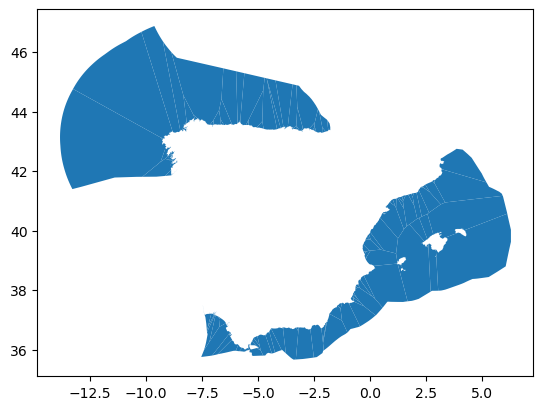

In [18]:
gdf_regions_offshore.plot()